# Problem

I want to find 45 numbers with in range of [17, 99] that makes an average of 59.32
\begin{align}
\frac{1}{45} \sum_{i=0}^{44}x_i = 59.32 \\
17 \leq x_i \leq 99
\end{align}
Find any combination of x_i that will make an average of 59.32

For this problem, I want to solve it with a genetic algorithm. Instead of using API ```gene_space = range(14, 99)``` nor initializing with ```init_range_low = 14```, ```init_range_high = 99```, I wanted to try to force the solutions into the range by implementing a penalty function. 

penlity function:
\begin{align}
a \neq b \\
f(x) = 
\begin{cases}
    x & a \leq x \leq b \\
    - 10^5 + x^3 & otherwise  \\
\end{cases}
\end{align}

This penlity function works, but I am unable to exmplain why the negative sign matters.

In [1]:
import pygad
import numpy
import matplotlib.pyplot as plt

In [2]:
desired_output = 59.32

In [3]:
#penlity function
#the more negative the number, the better the result. Up to -1E5, result of more negativity is negliable. 
def lgt(x, a=17, b=99):
    greaterThan = numpy.where(x < a, 0, 1)
    lessThan = numpy.where(x <= b, 1, 0)
    return numpy.where(x * greaterThan * lessThan == 0, -1E5+(x**3), x)

In [38]:
#GA wants to maximunize fitness. 
#The fitness function compares the desired to predict. 
def fitness_func(solution, solution_idx):
    output = numpy.average(lgt(solution))
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

Hyper params

In [5]:
fitness_function = fitness_func

#number epochs.
num_generations = 2000

#number of genes in chromsome. We want 45 because we want a solution to be an array of 45
num_genes = 45

#number of solution within pupulation
sol_per_pop = 41

#Initial range
#Set to [-50 to 50] to validate the effectiness of penlity function
#If set to [17, 99], nothing much the GA need to do and will converage in a few cycles
init_range_low = -50
init_range_high = 50

#parent selection method = Stochastic Universal Selection - SUS. 
#This selection method "exhibits no bias and minimal spread"
parent_selection_type = "sus"
keep_parents = 3

#Set to high mutation rate to accerate convergion. 
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 60
num_parents_mating = 25

In [6]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [7]:
ga_instance.run()

It shows the penlity function is working. All elements are within [17, 99], and the predicted is very close to desired.

In [8]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
prediction = numpy.average(solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [85.41931173 66.51627906 43.08436588 71.10861014 72.71008143 59.52646819
 53.14073032 51.29883416 77.42584    45.7993689  48.58146195 81.59244905
 48.86804363 64.38562125 53.06531501 41.27838483 55.99744961 73.63165326
 54.2806442  43.07440527 47.09135739 51.25711701 75.44842554 52.7833863
 42.75600667 46.07909066 42.33329718 54.82126266 46.4340347  79.81942868
 76.31128252 77.59217825 64.86511865 57.1550478  52.15118582 64.84478735
 36.78742282 72.25411071 49.65198908 62.70254746 41.34243786 60.8400411
 76.77709565 81.89293685 64.62313905]
Predicted output based on the best solution : 59.32000101312137


In [9]:
print("min value of array : {min_num}".format(min_num=min(solution)))
print("max value of array : {max_num}".format(max_num=max(solution)))

min value of array : 36.7874228182558
max value of array : 85.41931173475018


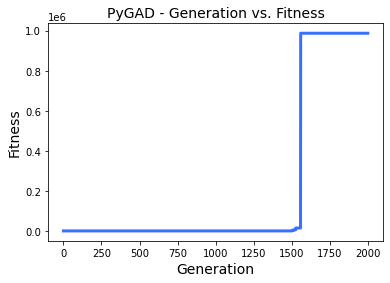

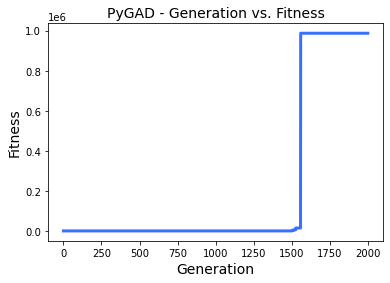

In [10]:
ga_instance.plot_fitness()

<BarContainer object of 10 artists>

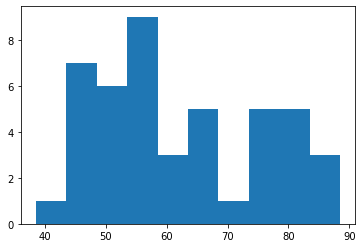

In [11]:
#Solution distrubution
a = numpy.array([])
b = numpy.array([])
i = int(min(solution))
j = i+5
while i <= max(solution):
    a = numpy.append(a, numpy.count_nonzero((solution >= i) & (solution < j)))
    b = numpy.append(b, j)
    i = j
    j += 5
plt.bar(b,a, 5)

This penlity function also works
\begin{align}
a \neq b \\
f(x) = 
\begin{cases}
    x & a \leq x \leq b \\
    - 10^5+x & otherwise  \\
\end{cases}
\end{align}

In [43]:
#Without the x^3, the function works as well. Just takes longer to converage ~8000 epochs
def lgt(x, a=17, b=99):
    greaterThan = numpy.where(x < a, 0, 1)
    lessThan = numpy.where(x <= b, 1, 0)
    return numpy.where(x * greaterThan * lessThan == 0, -1E5+x, x)

In [44]:
def fitness_func(solution, solution_idx):
    output = numpy.average(lgt(solution))
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

In [45]:
fitness_function = fitness_func

#number epochs -> 10000.
num_generations = 10000

In [46]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [47]:
ga_instance.run()

In [48]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
prediction = numpy.average(solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [95.76811321 65.30069194 87.88861496 91.92895174 20.46564445 83.20392527
 69.20315418 25.5080521  18.92425167 31.44847374 41.0826384  19.19826984
 56.57074469 46.73416347 70.47900294 55.46831335 18.6142971  40.22329456
 92.73160166 25.79354493 70.72300977 46.08858421 80.79554568 69.20260143
 21.55271276 72.77527659 61.49797475 64.0900125  93.65341286 65.98202966
 81.13026227 18.99341935 74.21357064 95.29434744 26.55793534 58.46503543
 52.28581499 86.0880235  35.98573735 69.46953347 91.25604668 87.96584144
 58.37693836 51.60968864 78.8108995 ]
Predicted output based on the best solution : 59.31999997376553


In [49]:
print("min value of array : {min_num}".format(min_num=min(solution)))
print("max value of array : {max_num}".format(max_num=max(solution)))

min value of array : 18.614297098364432
max value of array : 95.76811321167936


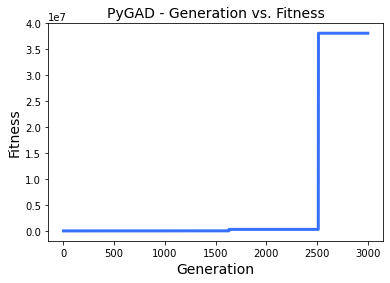

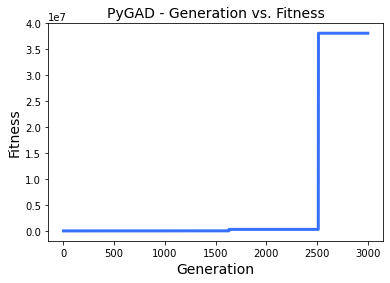

In [50]:
ga_instance.plot_fitness()

<BarContainer object of 16 artists>

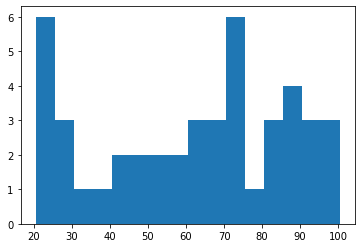

In [51]:
#Solution distrubution
a = numpy.array([])
b = numpy.array([])
i = int(min(solution))
j = i+5
while i <= max(solution):
    a = numpy.append(a, numpy.count_nonzero((solution >= i) & (solution < j)))
    b = numpy.append(b, j)
    i = j
    j += 5
plt.bar(b,a, 5)

However, if the constant is changed to positve number, the range regulation won't work. Why?

In [21]:
# -1E5 -> 1E5
def lgt(x, a=17, b=99):
    greaterThan = numpy.where(x < a, 0, 1)
    lessThan = numpy.where(x <= b, 1, 0)
    return numpy.where(x * greaterThan * lessThan == 0, 1E5+x, x)

In [22]:
def fitness_func(solution, solution_idx):
    output = numpy.average(lgt(solution))
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

In [23]:
fitness_function = fitness_func
num_generations = 10000

In [24]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [25]:
ga_instance.run()

In [26]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
prediction = numpy.average(solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 17.71377722  17.31299344  17.65591079  17.33169855  17.02969603
  19.28740284  18.31314551  17.94636189 -53.76151574  17.26081627
  17.13600466 -33.84011644  18.72591586  18.16741919 -93.52622424
  19.06251392 -53.60713305 -80.44971866  17.21316588 -67.75766744
  17.28328394  17.97291968  21.01078983  18.58933444  18.21278229
  17.71336441  19.3185958   18.15640235 -68.17831801  18.47370494
  18.66649041  18.95779831  20.85166765 -47.92106588  17.06442898
 -62.77696097 -78.3906316   17.08322265 -49.75222773  17.96676183
  17.24879443  18.96849874  17.10683244  17.84113711  17.52621844]
Predicted output based on the best solution : -1.6398162009054051


In [27]:
print("min value of array : {min_num}".format(min_num=min(solution)))
print("max value of array : {max_num}".format(max_num=max(solution)))

min value of array : -93.52622423940862
max value of array : 21.01078982579159


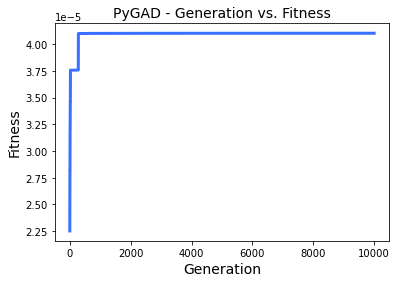

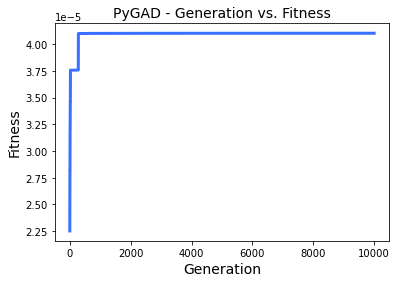

In [28]:
ga_instance.plot_fitness()

<BarContainer object of 23 artists>

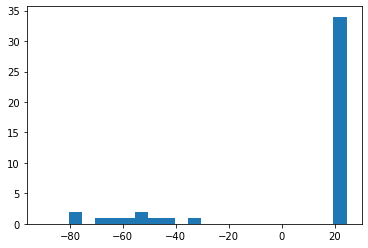

In [29]:
#Solution distrubution
a = numpy.array([])
b = numpy.array([])
i = int(min(solution))
j = i+5
while i <= max(solution):
    a = numpy.append(a, numpy.count_nonzero((solution >= i) & (solution < j)))
    b = numpy.append(b, j)
    i = j
    j += 5
plt.bar(b,a, 5)

# Why this works

Let's start with the ```x**3``` of the funtion. ```x**3``` retains the sign of x while making the values not in the range easier to elimate. For values moving to the desired direction will receive an explanically better fitness, it'll make the GA converge faster. 

In [30]:
t = numpy.arange(-15,16)

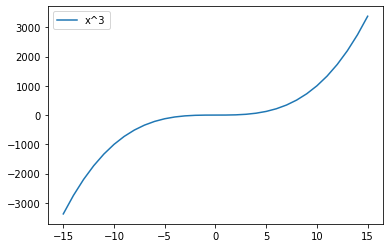

In [31]:
plt.plot(t, t**3, label='x^3')
plt.legend()

As we can see, the problem with this method is that it also wants to converge to 0, where the effect is minimized and therefore have no negative impact on fitness. Hence, the more offline have two choices: converge to zero; converge to within the range. To solve that problem, we can make x + some constant. So that even at 0, it still has a negative impact on the fitness

Function ```10000-x^3``` works about the same as ```x^3-10000```

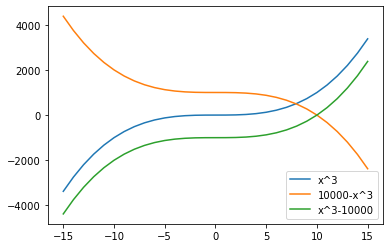

In [32]:
plt.plot(t, t**3, label='x^3')
plt.plot(t, 1000-(t**3), label='10000-x^3')
plt.plot(t, -1000+(t**3), label='x^3-10000')
plt.legend()

## x^3 + constant 

In [33]:
def lgt(x, func, a=17, b=99):
    greaterThan = numpy.where(x < a, 0, 1)
    lessThan = numpy.where(x <= b, 1, 0)
    return numpy.where(x * greaterThan * lessThan == 0, func, x)

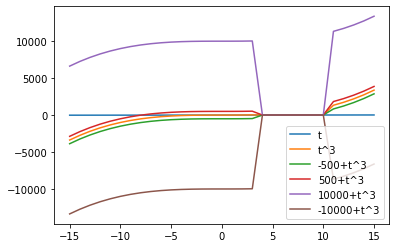

In [34]:
plt.plot(t, t, label='t')
plt.plot(t, lgt(t, t**3, 4,10), label='t^3')
plt.plot(t, lgt(t, -500+t**3, 4,10), label='-500+t^3')
plt.plot(t, lgt(t, 500+t**3, 4,10), label='500+t^3')
plt.plot(t, lgt(t, 10000+t**3, 4,10), label='10000+t^3')
plt.plot(t, lgt(t, -10000+t**3, 4,10), label='-10000+t^3')
plt.legend()

As we see, the greater number of the constant helps better distanish the elements that have a negative impact on the fitness. The ```x**3``` also provides a sense of direction to better converge to the range

So then, when positive constant doesn't work but negative constant works? The function ```x-10000``` works perfectly fine but just takes longer to converge without ```x**3```.

## Constant 

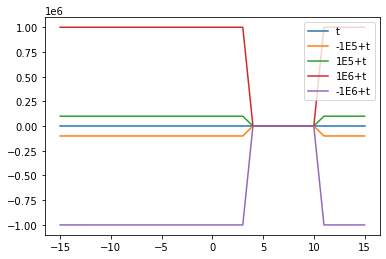

In [35]:
plt.plot(t, t, label='t')
plt.plot(t, lgt(t, -1E5+t, 4,10), label='-1E5+t')
plt.plot(t, lgt(t, 1E5+t, 4,10), label='1E5+t')
plt.plot(t, lgt(t, 1E6+t, 4,10), label='1E6+t')
plt.plot(t, lgt(t, -1E6+t, 4,10), label='-1E6+t')
plt.legend()

At some point, -1E5 has the same meaning as -1E6. As long as constant << min(solution), -1E5 is the same as -1E6. This explains why more negativity doesn't help accurates the converage after -1E5.

In [36]:
neg_avg=numpy.average(lgt(t, -10000+t, 4,10))
pos_avg=numpy.average(lgt(t, 10000+t, 4,10))
print("average of nagative number const: {neg_avg}".format(neg_avg=neg_avg))
print("average of positive number const: {pos_avg}".format(pos_avg=pos_avg))

average of nagative number const: -7741.935483870968
average of positive number const: 7741.935483870968


The problem isn't the way fitness is calculated either. If fitness is the issue here, change ```fitness = 1.0 / numpy.abs(output - desired_output)``` to ```fitness = 1.0 / numpy.abs(output + desired_output)``` should work for positve numbers. However, it doesn't.

```-10000+x``` should work the same as ```10000+x```. Yet, the experimental result showed only negative constant works. Why?